In [1]:
import os
import shutil

# Percorso della cartella di lavoro
folder_path = "/kaggle/working"

# Ottieni la lista dei file e delle cartelle all'interno della cartella di lavoro
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # Controlla se è un file o una cartella
    if os.path.isfile(file_path):
        os.remove(file_path)  # Rimuovi il file
    elif os.path.isdir(file_path):
        shutil.rmtree(file_path)  # Rimuovi la cartella e tutto il suo contenuto
print("FINITO")

FINITO


In [2]:
import os

# Percorso della nuova cartella
folder_path = "/kaggle/working/mumin-csv"

# Crea la cartella se non esiste già
os.makedirs(folder_path, exist_ok=True)

print(f"Cartella {folder_path} creata con successo!")

Cartella /kaggle/working/mumin-csv creata con successo!


In [3]:
import pandas as pd
file="/kaggle/input/mumin-small/tweet.pickle"
data = pd.read_pickle(file)
df_created_tweet_notNull = data[data['created_at'].notna()].copy()
df_created_tweet_notNull['indice']=df_created_tweet_notNull.index
df_created_tweet_notNull.to_csv('/kaggle/working/mumin-csv/df_non_null.csv', index=False)

# Conferma
print("DataFrame filtrato e salvato come CSV!")

DataFrame filtrato e salvato come CSV!


anno_mese
2014-03      1
2014-06      1
2014-11      2
2015-02      1
2015-03      1
          ... 
2021-03    155
2021-04    257
2021-05    241
2021-06    117
2021-07    119
Freq: M, Length: 75, dtype: int64


<Axes: title={'center': 'Numero di Tweet per Mese/Anno'}, xlabel='Mese/Anno', ylabel='Numero di Tweet'>

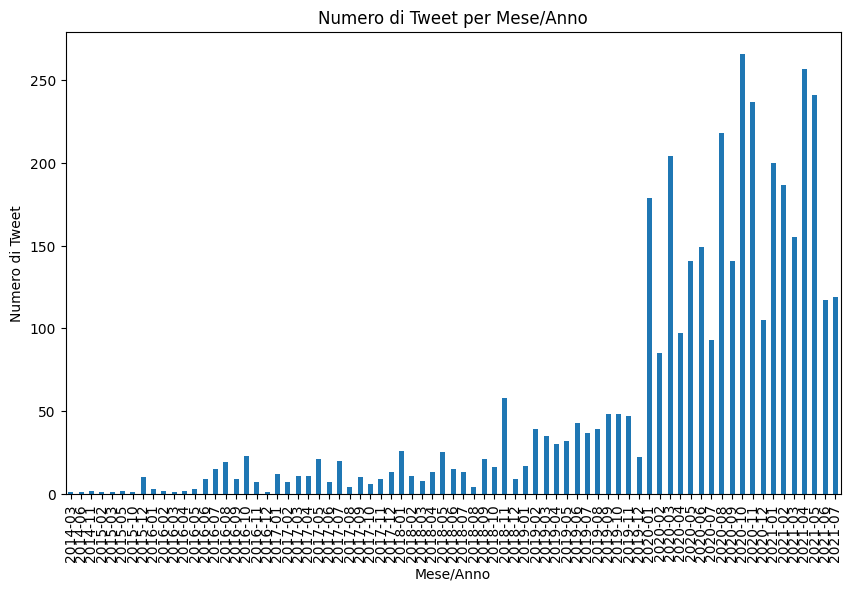

In [4]:
with open("/kaggle/working/mumin-csv/df_non_null.csv", "rb") as file:
    data = pd.read_csv(file)
#prendiamo la colonna current_time e dividiamo per mese|anno
data['tempo'] = pd.to_datetime(data['created_at'])
# Estrai l'anno e il mese dalla colonna 'tempo'
data['anno_mese'] = data['tempo'].dt.to_period('M')

# Raggruppa per anno e mese e conta i tweet
tweets_per_mese_anno = data.groupby('anno_mese').size()

# Mostra il risultato
print(tweets_per_mese_anno)

# Visualizza il risultato come un grafico
tweets_per_mese_anno.plot(kind='bar', figsize=(10, 6), title='Numero di Tweet per Mese/Anno', xlabel='Mese/Anno', ylabel='Numero di Tweet')

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

 #Trasforma il tempo in numeri per il clustering (usiamo il timestamp)
data['tempo_timestamp'] = data['tempo'].astype(int) / 10**9  # converte in secondi dal 1970

# Decidi il numero di cluster (ad esempio, 2 cluster)
n_clusters = 5

# Applica KMeans per creare i cluster
kmeans = KMeans(n_clusters=n_clusters , n_init='auto', random_state=42)
data['cluster'] = kmeans.fit_predict(data[['tempo_timestamp']])

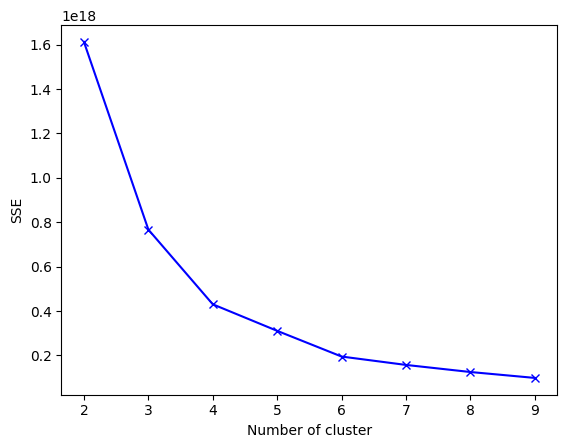

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(2, 10):
  kmeans = KMeans(init='k-means++', n_clusters=k, max_iter=1000 , n_init='auto').fit(data[['tempo_timestamp']])
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# plt.savefig(f"{base_path}/results/{dataset_name}_clustering.pdf", format="pdf", bbox_inches="tight")
plt.show()


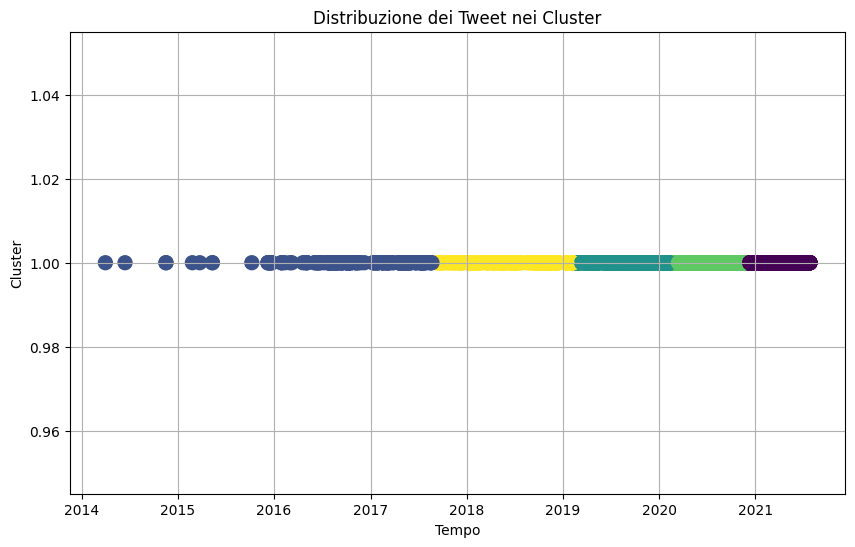

In [7]:
plt.figure(figsize=(10, 6))

# Ogni punto è un tweet, con il colore che rappresenta il cluster
plt.scatter(data['tempo'], [1]*len(data), c=data['cluster'], cmap='viridis', s=100, marker='o')

plt.title('Distribuzione dei Tweet nei Cluster')
plt.xlabel('Tempo')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()

In [8]:
import os
for cluster in data['cluster'].unique():
    # Filtro i dati per il cluster corrente
    cluster_data = data[data['cluster'] == cluster]
    # print(cluster_data['tweet_id'])
    # print(len(cluster_data['tweet_id'].unique()))

    # Trova la prima e l'ultima data per il cluster
    first_date = cluster_data['tempo'].min().strftime('%Y-%m-%d')
    last_date = cluster_data['tempo'].max().strftime('%Y-%m-%d')
    name=first_date + "_" + last_date
    name=name.replace("-",".")
    print(name)
    title = "/kaggle/working/" + name
    # Crea una cartella con il nome della prima e ultima data
    os.makedirs(title, exist_ok=True)


    # Salva i dati del cluster in un file CSV all'interno della cartella
    cluster_data.to_csv(os.path.join(title, f"cluster_{cluster}.csv"), index=False)
print("creazione avvenuta")

2020.02.22_2020.11.20
2017.09.09_2019.02.07
2019.02.08_2020.02.20
2020.11.22_2021.07.26
2014.03.31_2017.08.22
creazione avvenuta


In [9]:
import pandas as pd
import os

tweetPaths = [
   "/kaggle/working/mumin-csv/df_non_null.csv"
]

listTweetTo = {
    "/kaggle/input/mumin-small/tweet_discusses_claim.pickle": "/kaggle/input/mumin-small/claim.pickle",
    "/kaggle/input/mumin-small/tweet_has_article_article.pickle": "/kaggle/input/mumin-small/article.pickle",
    "/kaggle/input/mumin-small/tweet_has_hashtag_hashtag.pickle": "/kaggle/input/mumin-small/hashtag.pickle",
    "/kaggle/input/mumin-small/tweet_has_image_image.pickle": "/kaggle/input/mumin-small/image.pickle",
    "/kaggle/input/mumin-small/tweet_mentions_user.pickle": "/kaggle/input/mumin-small/user.pickle"
}

# Carica i file di mappatura (tweet -> nodo)
mapping_tweetTo = {key: pd.read_pickle(key) for key in listTweetTo.keys()}

countO={
    "/kaggle/input/mumin-small/tweet_discusses_claim.pickle":0,
    "/kaggle/input/mumin-small/tweet_has_article_article.pickle":0,
    "/kaggle/input/mumin-small/tweet_has_hashtag_hashtag.pickle":0,
     "/kaggle/input/mumin-small/tweet_has_image_image.pickle":0,
    "/kaggle/input/mumin-small/tweet_mentions_user.pickle":0
}



for tweetPath in tweetPaths:
    # Caricare il dataset dei tweet
    df_tweet = pd.read_csv(tweetPath)

    # Rimuovere eventuali duplicati sugli indici dei tweet
    df_tweet = df_tweet.drop_duplicates(subset=['indice'])

    # Creare la cartella per salvare i file corrispondenti
    tweet_dir = os.path.dirname(tweetPath)

    for mapping_path, target_path in listTweetTo.items():
        # Caricare la mappatura (tweet -> nodo corrispondente)
        df_nodo = mapping_tweetTo[mapping_path]

        # Rimuovere i duplicati nei file di mappatura
        df_nodo = df_nodo.drop_duplicates(subset=['src', 'tgt'])

        # Filtrare i tweet presenti nella mappatura
       
        df_filtered = df_nodo[df_nodo['src'].isin(df_tweet['indice'])]

        countO[mapping_path]+=len(df_filtered)
        print(f"df_nodo {len(df_nodo)}, df_filtered {len(df_filtered)} , count:{countO[mapping_path]}")
        
        


      
print(countO)
print("Finito")

df_nodo 5081, df_filtered 4785 , count:4785
df_nodo 1898, df_filtered 1898 , count:1898
df_nodo 2278, df_filtered 2278 , count:2278
df_nodo 1028, df_filtered 1028 , count:1028
df_nodo 1117, df_filtered 1117 , count:1117
{'/kaggle/input/mumin-small/tweet_discusses_claim.pickle': 4785, '/kaggle/input/mumin-small/tweet_has_article_article.pickle': 1898, '/kaggle/input/mumin-small/tweet_has_hashtag_hashtag.pickle': 2278, '/kaggle/input/mumin-small/tweet_has_image_image.pickle': 1028, '/kaggle/input/mumin-small/tweet_mentions_user.pickle': 1117}
Finito


In [10]:
import pandas as pd
import os

tweetPaths = [
  
    "/kaggle/working/2014.03.31_2017.08.22/cluster_1.csv",
    "/kaggle/working/2017.09.09_2019.02.07/cluster_4.csv",
    "/kaggle/working/2019.02.08_2020.02.20/cluster_2.csv",
    "/kaggle/working/2020.02.22_2020.11.20/cluster_3.csv",
    "/kaggle/working/2020.11.22_2021.07.26/cluster_0.csv"

]

listTweetTo = {
    "/kaggle/input/mumin-small/tweet_discusses_claim.pickle": "/kaggle/input/mumin-small/claim.pickle",
    "/kaggle/input/mumin-small/tweet_has_article_article.pickle": "/kaggle/input/mumin-small/article.pickle",
    "/kaggle/input/mumin-small/tweet_has_hashtag_hashtag.pickle": "/kaggle/input/mumin-small/hashtag.pickle",
    "/kaggle/input/mumin-small/tweet_has_image_image.pickle": "/kaggle/input/mumin-small/image.pickle",
    "/kaggle/input/mumin-small/tweet_mentions_user.pickle": "/kaggle/input/mumin-small/user.pickle"
}

# Carica i file di mappatura (tweet -> nodo)
mapping_tweetTo = {key: pd.read_pickle(key) for key in listTweetTo.keys()}

count={
    "/kaggle/input/mumin-small/tweet_discusses_claim.pickle":0,
    "/kaggle/input/mumin-small/tweet_has_article_article.pickle":0,
    "/kaggle/input/mumin-small/tweet_has_hashtag_hashtag.pickle":0,
     "/kaggle/input/mumin-small/tweet_has_image_image.pickle":0,
    "/kaggle/input/mumin-small/tweet_mentions_user.pickle":0
}



for tweetPath in tweetPaths:
    # Caricare il dataset dei tweet
    df_tweet = pd.read_csv(tweetPath)

    # Rimuovere eventuali duplicati sugli indici dei tweet
    df_tweet = df_tweet.drop_duplicates(subset=['indice'])

    # Creare la cartella per salvare i file corrispondenti
    tweet_dir = os.path.dirname(tweetPath)

    for mapping_path, target_path in listTweetTo.items():
        # Caricare la mappatura (tweet -> nodo corrispondente)
        df_nodo = mapping_tweetTo[mapping_path]

        # Rimuovere i duplicati nei file di mappatura
        df_nodo = df_nodo.drop_duplicates(subset=['src', 'tgt'])

        # Filtrare i tweet presenti nella mappatura
       
        df_filtered = df_nodo[df_nodo['src'].isin(df_tweet['indice'])]
       
        

        count[mapping_path]+=len(df_filtered)
        print(f"df_nodo {len(df_nodo)}, df_filtered {len(df_filtered)} ,count:{count[mapping_path]}")
        
        if not df_filtered.empty:
            # Caricare il dataset target e filtrare i nodi corrispondenti
            df_target = pd.read_pickle(target_path)
            df_final = df_target[df_target.index.isin(df_filtered['tgt'])]

           
            arco =  os.path.join(tweet_dir, os.path.basename(mapping_path).replace('.pickle', '.csv'))
            df_filtered.to_csv(arco,index=False)
            print(f"Arco salvato: {arco}")
            
            # Salvare il nuovo file nella cartella del tweet di partenza
            filename = os.path.join(tweet_dir, os.path.basename(target_path).replace('.pickle', '.csv'))
            df_final.to_csv(filename, index=False)
            print(f"Salvato: {filename}")

print("Operazione completata!")


      
print(count)
print("Finito")

df_nodo 5081, df_filtered 210 ,count:210
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/tweet_discusses_claim.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/claim.csv
df_nodo 1898, df_filtered 127 ,count:127
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/tweet_has_article_article.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/article.csv
df_nodo 2278, df_filtered 45 ,count:45
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/tweet_has_hashtag_hashtag.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/hashtag.csv
df_nodo 1028, df_filtered 66 ,count:66
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/tweet_has_image_image.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/image.csv
df_nodo 1117, df_filtered 41 ,count:41
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/tweet_mentions_user.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/user.csv
df_nodo 5081, df_filtered 296 ,count:506
Arco salvato: /kaggle/working/2017.09.09_2019.02.07/tweet_discusses_claim.cs

In [ ]:
#numero nodi per ogni deltaTime per ogni tipoNodo in un dictionary  "nomeDictionaryTemp":{user:lenUser}

In [ ]:
for key,value in countO.items():
    print({value})
print("--------------------------------------------------------------------")
for key,value in count.items():
    print({value})

In [19]:
data=pd.read_pickle("/kaggle/input/mumin-small/tweet.pickle")
print(data.columns)
print(data['source'].head(30))

Index(['tweet_id', 'text', 'created_at', 'lang', 'source', 'num_retweets',
       'num_replies', 'num_quote_tweets', 'text_emb', 'lang_emb'],
      dtype='object')
0     Twitter for Android
1     Twitter for Android
2     Twitter for Android
3     Twitter for Android
4     Twitter for Android
5     Twitter for Android
6         Twitter Web App
7     Twitter for Android
8      Twitter for iPhone
9         Twitter Web App
10        Twitter Web App
11              TweetDeck
12                swonkie
13       Correio da Manhã
14        Twitter Web App
15     Twitter for iPhone
16          WordPress.com
17              TweetDeck
18                Echobox
19     Twitter for iPhone
20    Twitter for Android
21         Hootsuite Inc.
22    Twitter for Android
23    Twitter for Android
24        Twitter Web App
25     Twitter for iPhone
26    SWAT Comunicacional
27        Twitter Web App
28            AlbertoNews
29                Echobox
Name: source, dtype: object


In [11]:
import pandas as pd
import os

tweetPaths = [
  
    "/kaggle/working/2014.03.31_2017.08.22/cluster_1.csv",
    "/kaggle/working/2017.09.09_2019.02.07/cluster_4.csv",
    "/kaggle/working/2019.02.08_2020.02.20/cluster_2.csv",
    "/kaggle/working/2020.02.22_2020.11.20/cluster_3.csv",
    "/kaggle/working/2020.11.22_2021.07.26/cluster_0.csv"

]

listTweetTo = {
    "/kaggle/input/mumin-small/reply_quote_of_tweet.pickle":"/kaggle/input/mumin-small/reply.pickle",
    "/kaggle/input/mumin-small/reply_reply_to_tweet.pickle":"/kaggle/input/mumin-small/reply.pickle"
    
}

# Carica i file di mappatura (tweet -> nodo)
mapping_tweetTo = {key: pd.read_pickle(key) for key in listTweetTo.keys()}

count={
    "/kaggle/input/mumin-small/reply_quote_of_tweet.pickle":0,
    "/kaggle/input/mumin-small/reply_reply_to_tweet.pickle":0,
  
}



for tweetPath in tweetPaths:
    # Caricare il dataset dei tweet
    df_tweet = pd.read_csv(tweetPath)

    # Rimuovere eventuali duplicati sugli indici dei tweet
    df_tweet = df_tweet.drop_duplicates(subset=['indice'])

    # Creare la cartella per salvare i file corrispondenti
    tweet_dir = os.path.dirname(tweetPath)

    for mapping_path, target_path in listTweetTo.items():
        # Caricare la mappatura (tweet -> nodo corrispondente)
        df_nodo = mapping_tweetTo[mapping_path]

        # Rimuovere i duplicati nei file di mappatura
        df_nodo = df_nodo.drop_duplicates(subset=['src', 'tgt'])

        # Filtrare i tweet presenti nella mappatura
       
        df_filtered = df_nodo[df_nodo['tgt'].isin(df_tweet['indice'])]
       
        

        count[mapping_path]+=len(df_filtered)
        print(f"df_nodo {len(df_nodo)}, df_filtered {len(df_filtered)} ,count:{count[mapping_path]}")
        
        if not df_filtered.empty:
            # Caricare il dataset target e filtrare i nodi corrispondenti
            df_target = pd.read_pickle(target_path)
            df_final = df_target[df_target.index.isin(df_filtered['src'])]

           
            arco =  os.path.join(tweet_dir, os.path.basename(mapping_path).replace('.pickle', '.csv'))
            df_filtered.to_csv(arco,index=False)
            print(f"Arco salvato: {arco}")
            
            # Salvare il nuovo file nella cartella del tweet di partenza
            filename = os.path.join(tweet_dir, os.path.basename(target_path).replace('.pickle', '.csv'))
            df_final.to_csv(filename, index=False)
            print(f"Salvato: {filename}")

print("Operazione completata!")


      
print(count)
print("Finito")

df_nodo 101216, df_filtered 4104 ,count:4104
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/reply_quote_of_tweet.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/reply.csv
df_nodo 90196, df_filtered 3176 ,count:3176
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/reply_reply_to_tweet.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/reply.csv
df_nodo 101216, df_filtered 7334 ,count:11438
Arco salvato: /kaggle/working/2017.09.09_2019.02.07/reply_quote_of_tweet.csv
Salvato: /kaggle/working/2017.09.09_2019.02.07/reply.csv
df_nodo 90196, df_filtered 4733 ,count:7909
Arco salvato: /kaggle/working/2017.09.09_2019.02.07/reply_reply_to_tweet.csv
Salvato: /kaggle/working/2017.09.09_2019.02.07/reply.csv
df_nodo 101216, df_filtered 15355 ,count:26793
Arco salvato: /kaggle/working/2019.02.08_2020.02.20/reply_quote_of_tweet.csv
Salvato: /kaggle/working/2019.02.08_2020.02.20/reply.csv
df_nodo 90196, df_filtered 13441 ,count:21350
Arco salvato: /kaggle/working/2019.02.08_2020.02.20/reply_

In [ ]:
data0=pd.read_pickle("/kaggle/input/mumin-small/reply_quote_of_tweet.pickle")
data1=pd.read_pickle("/kaggle/input/mumin-small/reply_reply_to_tweet.pickle")
data2=pd.read_csv("/kaggle/working/2014.03.31_2017.08.22/reply_quote_of_tweet.csv")
data3=pd.read_csv("/kaggle/working/2014.03.31_2017.08.22/reply_reply_to_tweet.csv")
data4=pd.read_csv("/kaggle/working/2017.09.09_2019.02.07/reply_quote_of_tweet.csv")
data5=pd.read_csv("/kaggle/working/2017.09.09_2019.02.07/reply_reply_to_tweet.csv")
data6=pd.read_csv("/kaggle/working/2019.02.08_2020.02.20/reply_quote_of_tweet.csv")
data7=pd.read_csv("/kaggle/working/2019.02.08_2020.02.20/reply_reply_to_tweet.csv")
data8=pd.read_csv("/kaggle/working/2020.02.22_2020.11.20/reply_quote_of_tweet.csv")
data9=pd.read_csv("/kaggle/working/2020.02.22_2020.11.20/reply_reply_to_tweet.csv")
data10=pd.read_csv("/kaggle/working/2020.11.22_2021.07.26/reply_quote_of_tweet.csv")
data11=pd.read_csv("/kaggle/working/2020.11.22_2021.07.26/reply_reply_to_tweet.csv")
print("reply_to_tweet")
tot1=len(data2)  + len(data4) + len(data6) +len(data8) +len(data10)
print(f"{len(data0)} ,{tot1}, {len(data2)}  , {len(data4)} , {len(data6)} , {len(data8)} , {len(data10)}  ")
print("-"*20)
tot2=len(data3)  + len(data5) + len(data7) +len(data9) +len(data11)
print(f"{len(data1)} ,{tot2}, {len(data3)}  , {len(data5)} , {len(data7)} , {len(data9)} , {len(data11)}  ")


In [12]:
import pandas as pd
import os

tweetPaths = [
  
    "/kaggle/working/2014.03.31_2017.08.22/user.csv",
    "/kaggle/working/2017.09.09_2019.02.07/user.csv",
    "/kaggle/working/2019.02.08_2020.02.20/user.csv",
    "/kaggle/working/2020.02.22_2020.11.20/user.csv",
    "/kaggle/working/2020.11.22_2021.07.26/user.csv"

]

listTweetTo = {
   "/kaggle/input/mumin-small/user_posted_tweet.pickle":"/kaggle/input/mumin-small/tweet.pickle",
   "/kaggle/input/mumin-small/user_posted_reply.pickle":"/kaggle/input/mumin-small/reply.pickle",
    "/kaggle/input/mumin-small/user_mentions_user.pickle": "/kaggle/input/mumin-small/user.pickle",
    "/kaggle/input/mumin-small/user_follows_user.pickle": "/kaggle/input/mumin-small/user.pickle",
    "/kaggle/input/mumin-small/user_retweeted_tweet.pickle":"/kaggle/input/mumin-small/tweet.pickle",
    "/kaggle/input/mumin-small/user_has_hashtag_hashtag.pickle": "/kaggle/input/mumin-small/hashtag.pickle",
    
}

# Carica i file di mappatura (tweet -> nodo)
mapping_tweetTo = {key: pd.read_pickle(key) for key in listTweetTo.keys()}

count={
    "/kaggle/input/mumin-small/user_posted_tweet.pickle":0,
    "/kaggle/input/mumin-small/user_posted_reply.pickle":0,
    "/kaggle/input/mumin-small/user_mentions_user.pickle":0,
     "/kaggle/input/mumin-small/user_retweeted_tweet.pickle":0,
    "/kaggle/input/mumin-small/user_has_hashtag_hashtag.pickle":0,
    "/kaggle/input/mumin-small/user_follows_user.pickle":0
}



for tweetPath in tweetPaths:
    # Caricare il dataset dei tweet
    df_tweet = pd.read_csv(tweetPath)

    

    # Creare la cartella per salvare i file corrispondenti
    tweet_dir = os.path.dirname(tweetPath)

    for mapping_path, target_path in listTweetTo.items():
        # Caricare la mappatura (tweet -> nodo corrispondente)
        df_nodo = mapping_tweetTo[mapping_path]

        # Rimuovere i duplicati nei file di mappatura
        df_nodo = df_nodo.drop_duplicates(subset=['src', 'tgt'])

        # Filtrare i tweet presenti nella mappatura
       
        df_filtered = df_nodo[df_nodo['src'].isin(df_tweet.index)]
       
        

        count[mapping_path]+=len(df_filtered)
        print(f"df_nodo {len(df_nodo)}, df_filtered {len(df_filtered)} ,count:{count[mapping_path]}")
        
        if not df_filtered.empty:
            # Caricare il dataset target e filtrare i nodi corrispondenti
            df_target = pd.read_pickle(target_path)
            df_final = df_target[df_target.index.isin(df_filtered['tgt'])]

           
            arco =  os.path.join(tweet_dir, os.path.basename(mapping_path).replace('.pickle', '.csv'))
            df_filtered.to_csv(arco,index=False)
            print(f"Arco salvato: {arco}")
            
            #Salvare il nuovo file nella cartella del tweet di partenza
            filename = os.path.join(tweet_dir, os.path.basename(target_path).replace('.pickle', '.csv'))
            df_final.to_csv(filename, index=False)
            print(f"Salvato: {filename}")

print("Operazione completata!")


      
print(count)
print("Finito")

df_nodo 4091, df_filtered 70 ,count:70
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/user_posted_tweet.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/tweet.csv
df_nodo 179247, df_filtered 35 ,count:35
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/user_posted_reply.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/reply.csv
df_nodo 2770, df_filtered 6 ,count:6
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/user_mentions_user.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/user.csv
df_nodo 18313, df_filtered 162 ,count:162
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/user_follows_user.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/user.csv
df_nodo 13402, df_filtered 1 ,count:1
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/user_retweeted_tweet.csv
Salvato: /kaggle/working/2014.03.31_2017.08.22/tweet.csv
df_nodo 50353, df_filtered 7 ,count:7
Arco salvato: /kaggle/working/2014.03.31_2017.08.22/user_has_hashtag_hashtag.csv
Salvato: /kaggle/working/20

In [13]:
#numero nodi per ogni deltaTime per ogni tipoNodo in un dictionary  "nomeDictionaryTemp":{user:lenUser}
import os
import pandas as pd
import json

def get_dataset_lengths(root_folder):
    data_dict = {}
    
    for folder in os.listdir(root_folder):  # Scansiona le sottocartelle
        folder_path = os.path.join(root_folder, folder)
        if os.path.isdir(folder_path):  # Verifica se è una cartella
            data_dict[folder] = {}
            
            for file in os.listdir(folder_path):  # Scansiona i file nella cartella
                file_path = os.path.join(folder_path, file)
                
                if os.path.isfile(file_path) and file.endswith(('.csv', '.txt')):  # Considera solo CSV e TXT
                    try:
                        df = pd.read_csv(file_path)  # Carica il dataset
                        data_dict[folder][file] = len(df)  # Memorizza la lunghezza del dataset
                    except Exception as e:
                        print(f"Errore con il file {file_path}: {e}")
    
    return data_dict

def save_to_json(data, output_dir, output_filename):
    os.makedirs(output_dir, exist_ok=True)  # Crea la directory se non esiste
    output_file = os.path.join(output_dir, output_filename)
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=4)
    print(f"Dati salvati in {output_file}")


print("exit 0")


exit 0


In [14]:
root_directory = "/kaggle/working/"  # Cambia con il percorso della tua cartella principale
output_directory = "/kaggle/working/"  # Directory in cui salvare il JSON
dataset_info = get_dataset_lengths(root_directory)
json_output_file = "dataset_info.json"
save_to_json(dataset_info, output_directory, json_output_file)


Dati salvati in /kaggle/working/dataset_info.json
